In [41]:
#Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [42]:
data=pd.read_csv('train.csv') #Reading the CSV file
df=pd.DataFrame(data)         #Converting it into a DataFrame

In [43]:
 #Top 10 values from the dataset
df.head(10)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
5,6,2579,132,6,300,-15,67,230,237,140,...,0,0,0,0,0,0,0,0,0,2
6,7,2606,45,7,270,5,633,222,225,138,...,0,0,0,0,0,0,0,0,0,5
7,8,2605,49,4,234,7,573,222,230,144,...,0,0,0,0,0,0,0,0,0,5
8,9,2617,45,9,240,56,666,223,221,133,...,0,0,0,0,0,0,0,0,0,5
9,10,2612,59,10,247,11,636,228,219,124,...,0,0,0,0,0,0,0,0,0,5


In [44]:
#Last 10 values from the DataFrame
df.tail(10)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
15110,15111,2508,33,26,67,1,644,204,173,91,...,0,0,0,0,0,0,0,0,0,6
15111,15112,2610,59,17,60,10,674,231,202,98,...,0,0,0,0,0,0,0,0,0,6
15112,15113,2600,38,25,124,0,589,212,178,89,...,0,0,0,0,0,0,0,0,0,6
15113,15114,2688,104,15,443,10,805,245,219,99,...,0,0,0,0,0,0,0,0,0,3
15114,15115,2670,108,12,624,24,730,241,225,112,...,0,0,0,0,0,0,0,0,0,3
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3
15119,15120,2475,197,34,319,78,270,189,244,164,...,0,0,0,0,0,0,0,0,0,3


In [45]:
#Checking the shape
df.shape

(15120, 56)

In [46]:
#Retrieving the column names
df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [47]:
#Retreiving the informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [48]:
#Description of df
df.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [49]:
df.isnull().sum() #Checking for null values 

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


In [50]:
df.duplicated().sum() #Checking for duplicate values

np.int64(0)

<Axes: >

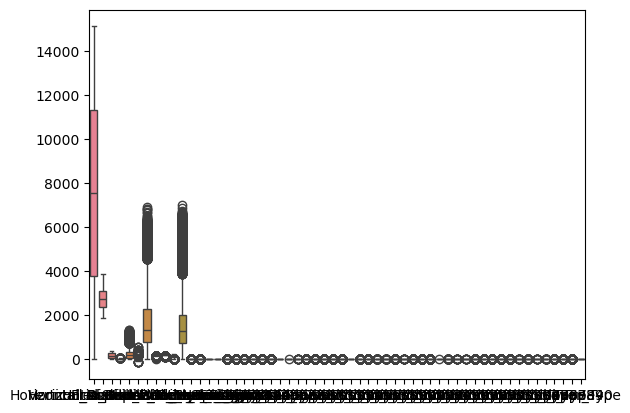

In [51]:
#Boxplot for df1 DataFrame
sns.boxplot(data=df)

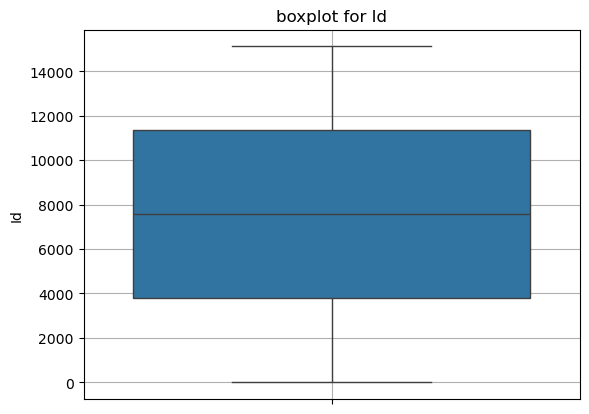

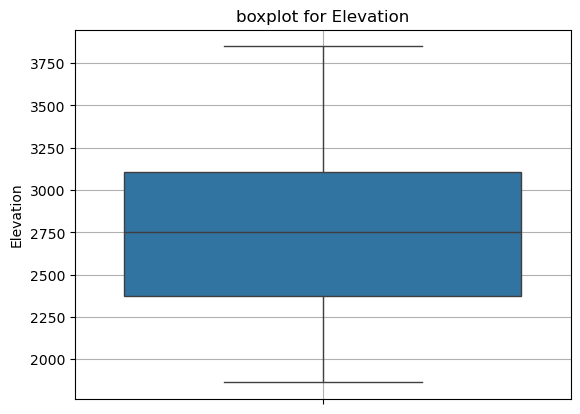

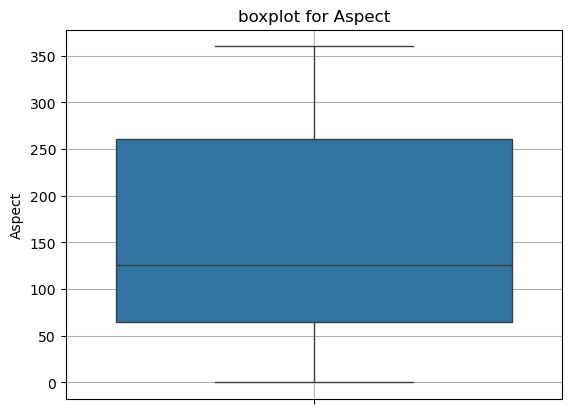

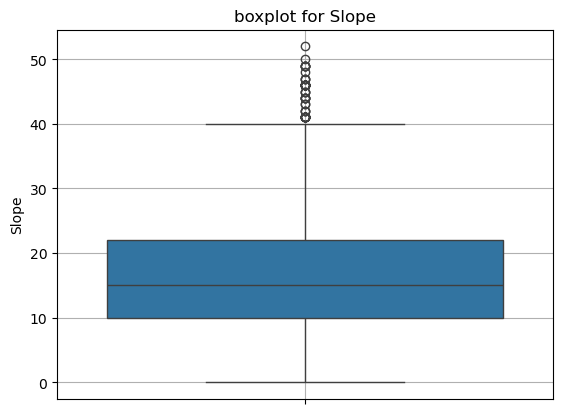

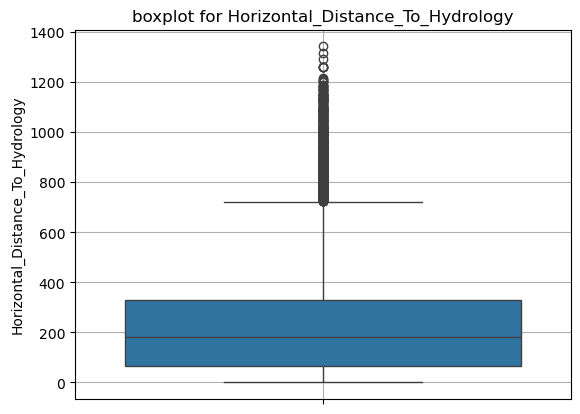

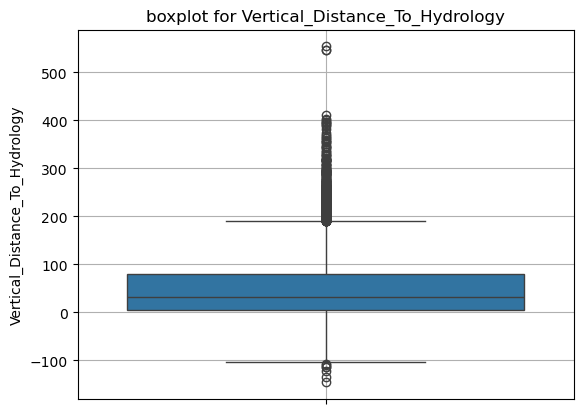

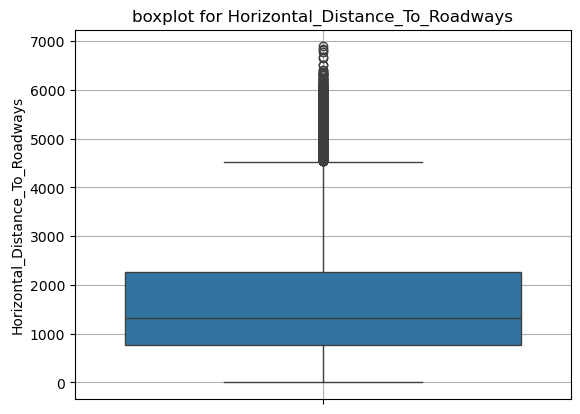

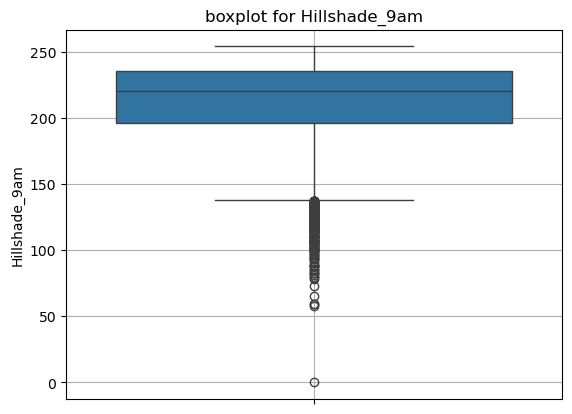

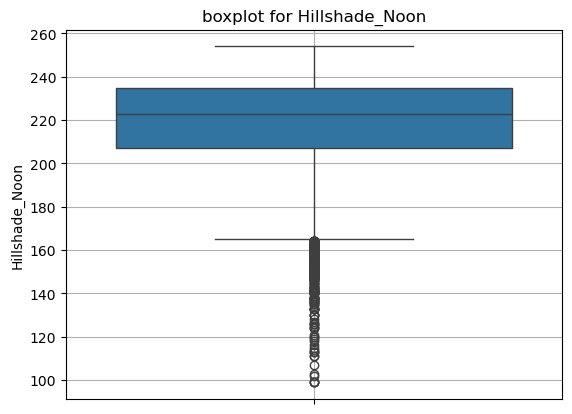

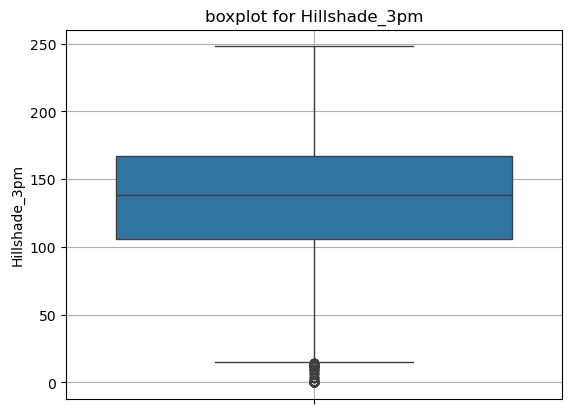

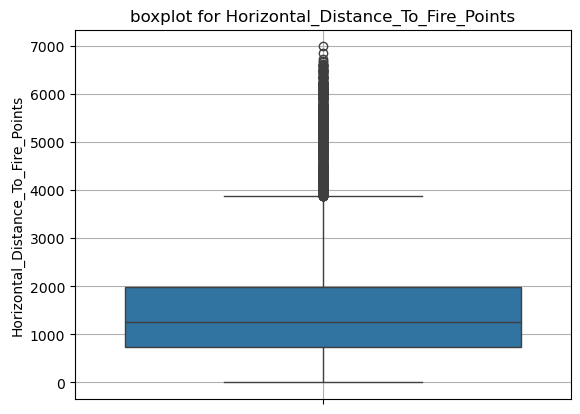

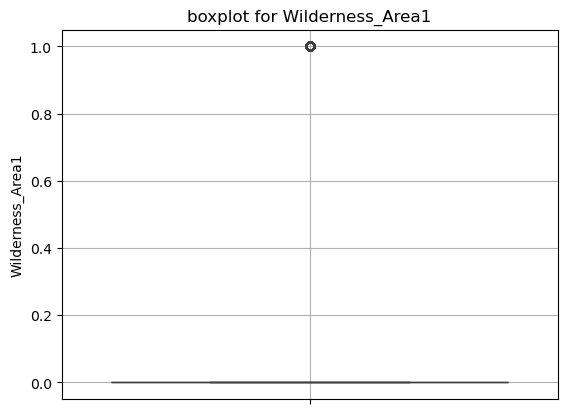

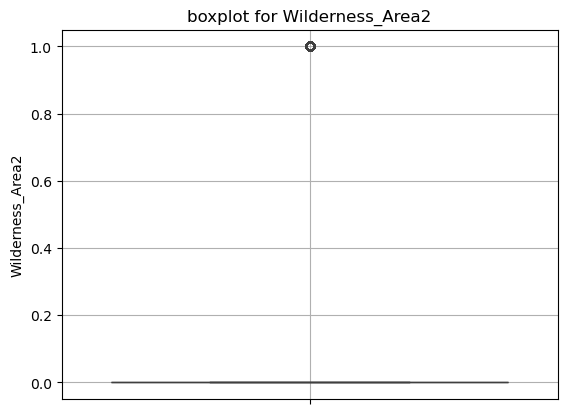

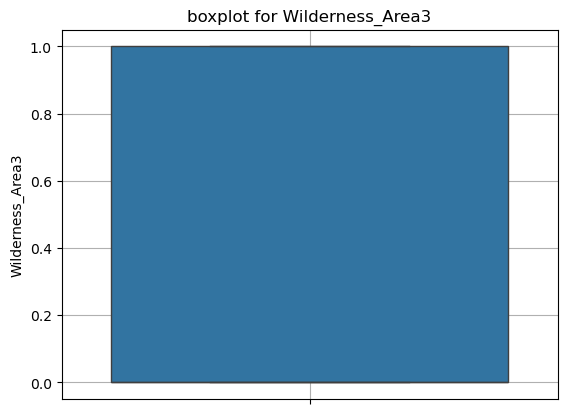

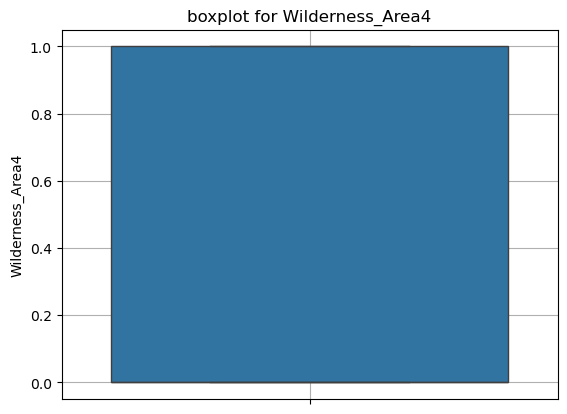

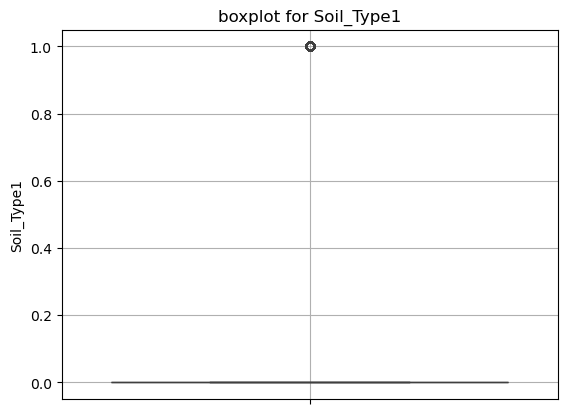

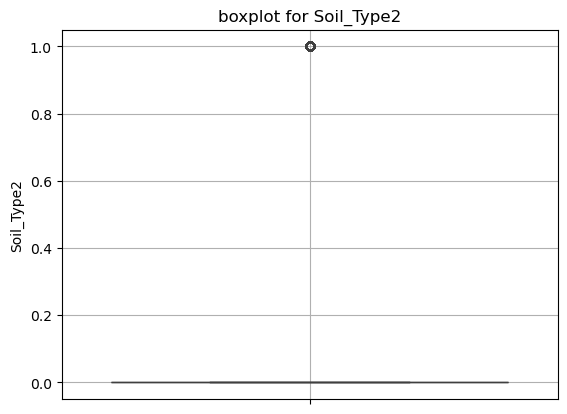

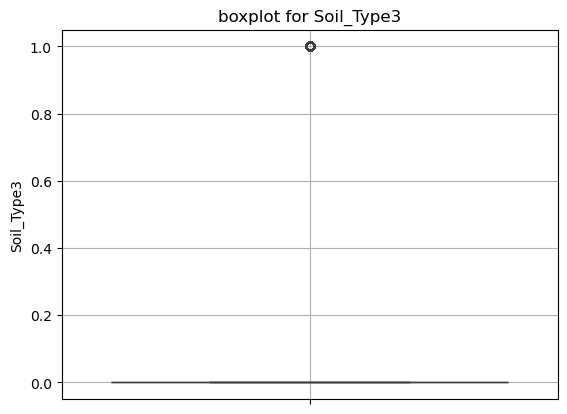

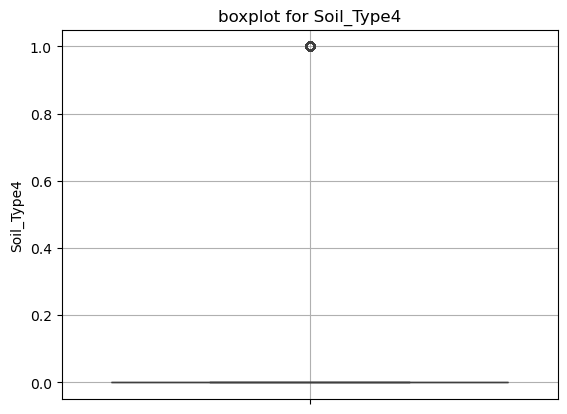

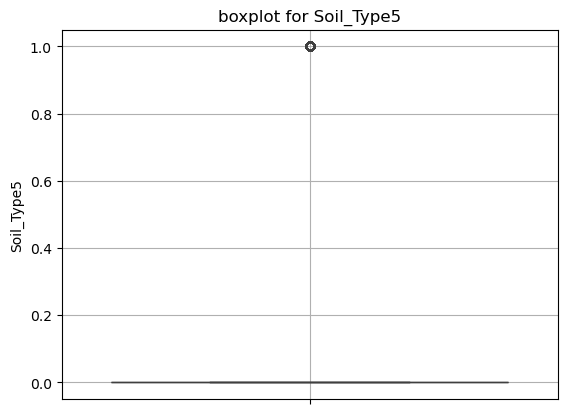

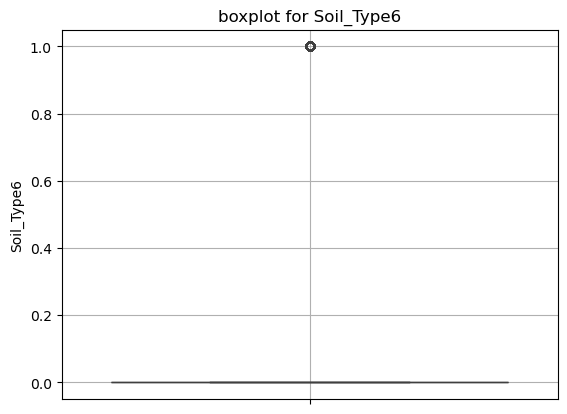

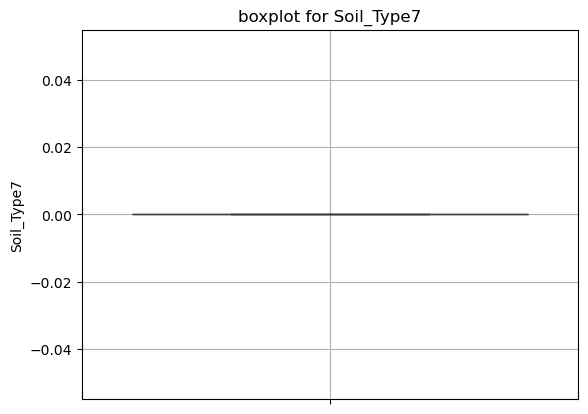

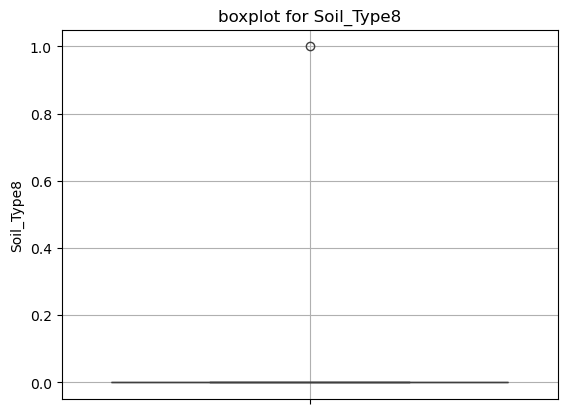

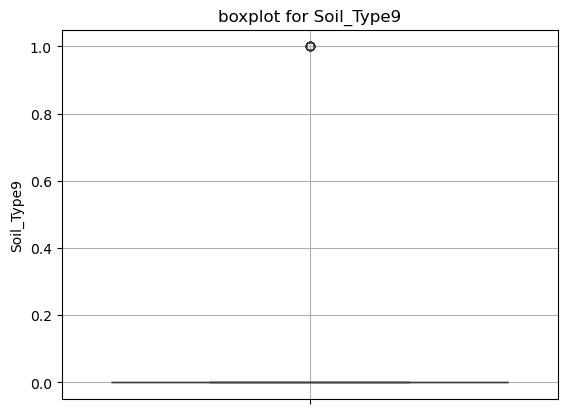

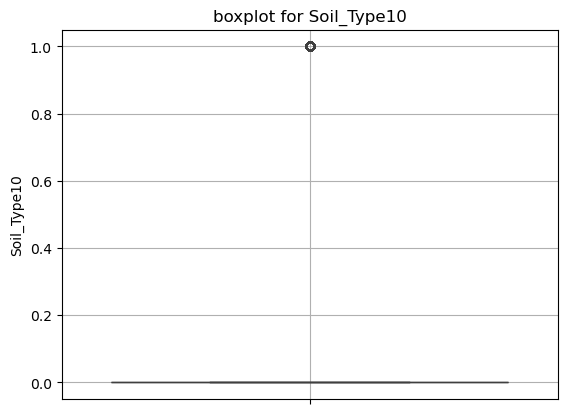

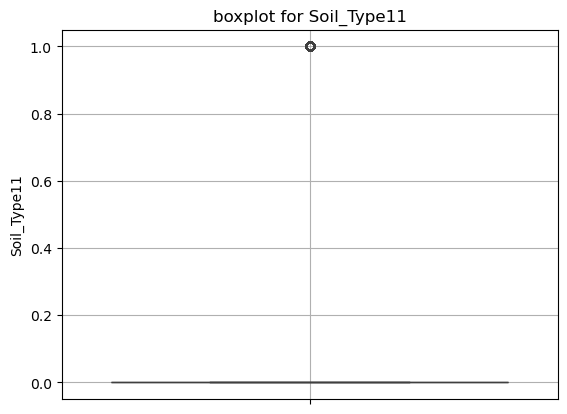

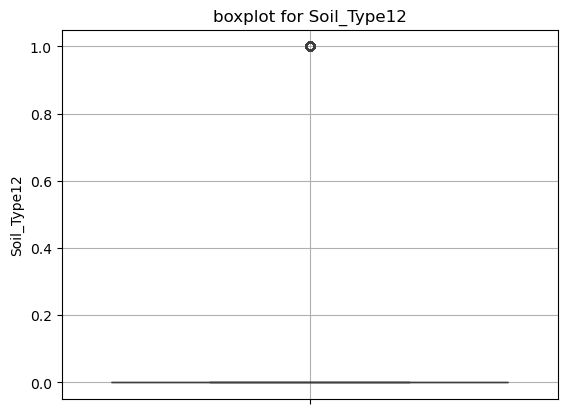

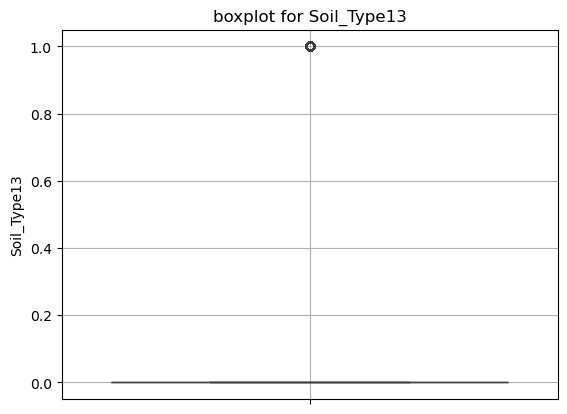

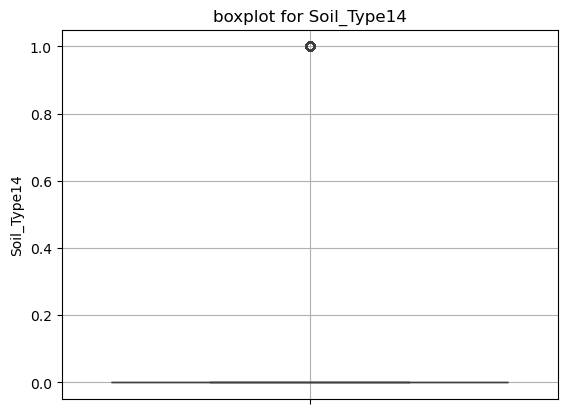

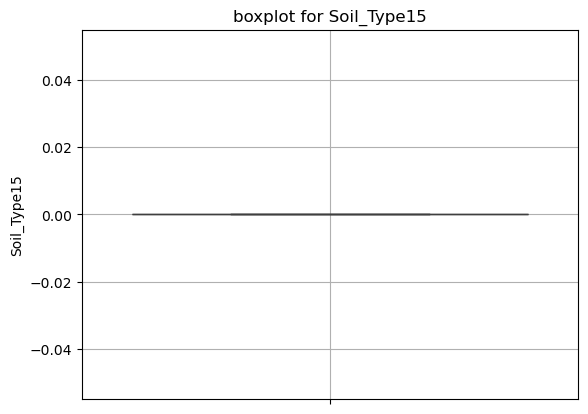

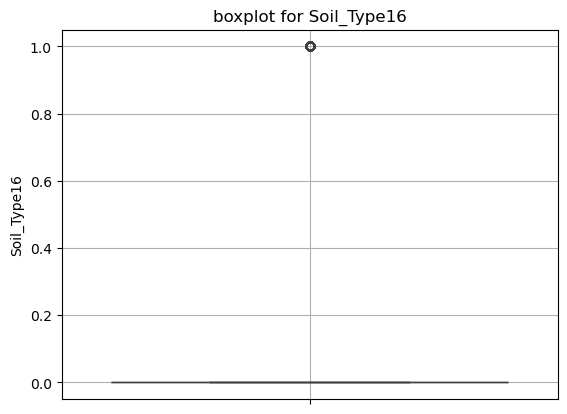

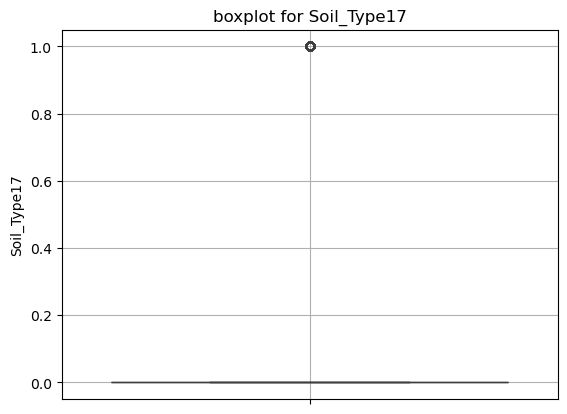

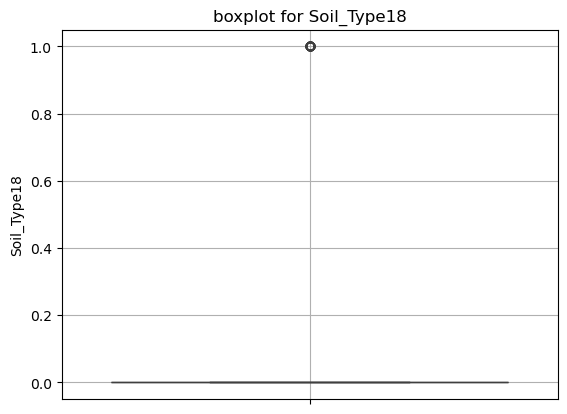

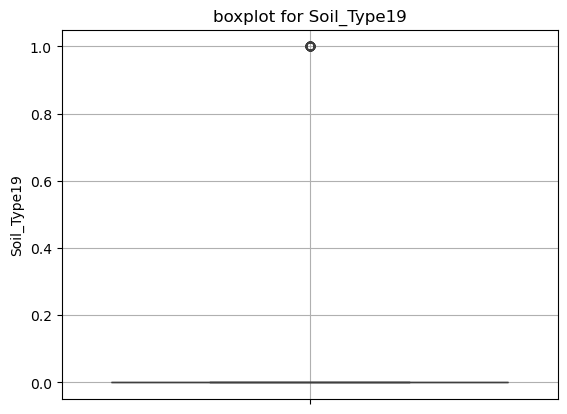

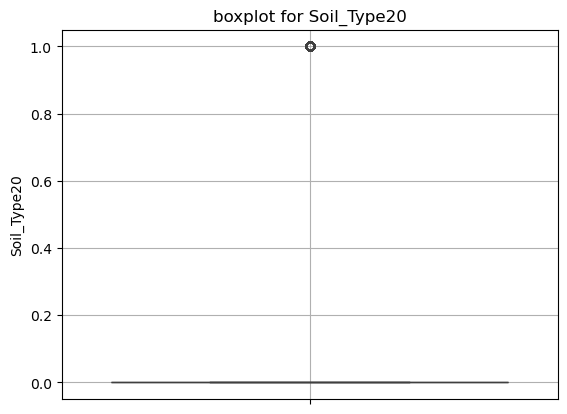

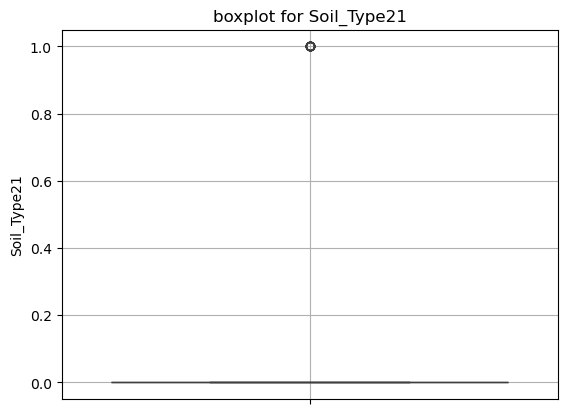

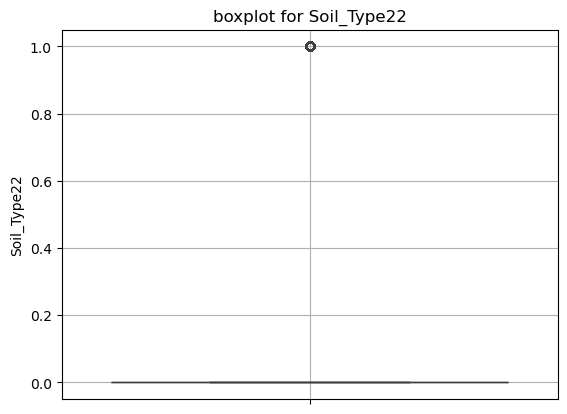

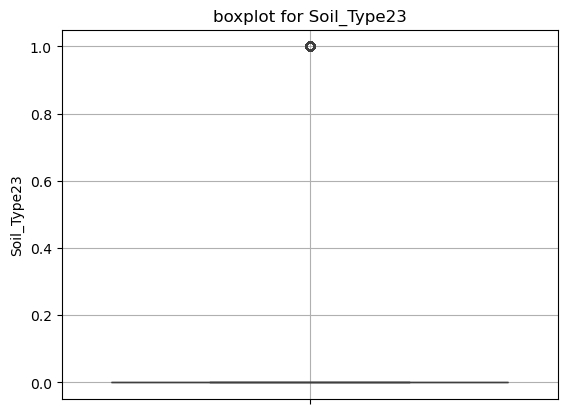

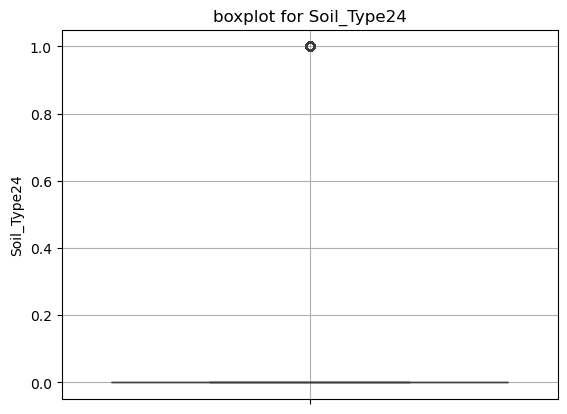

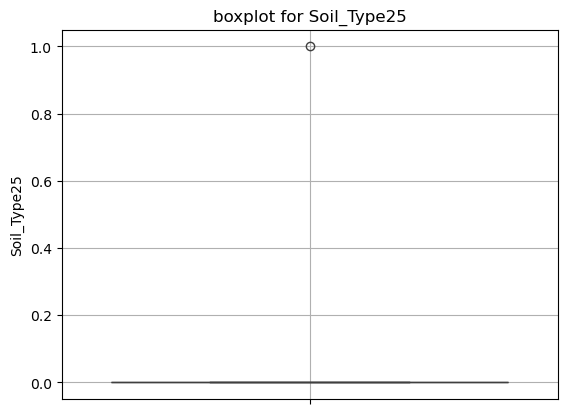

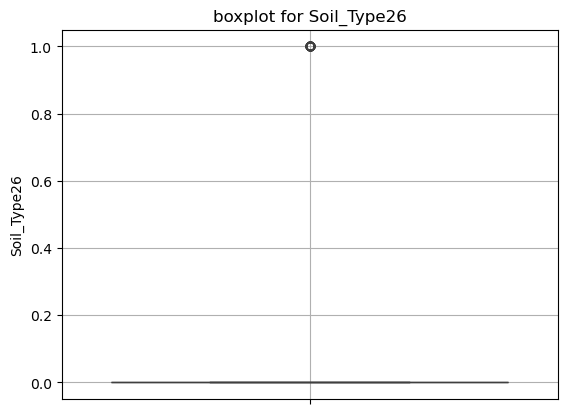

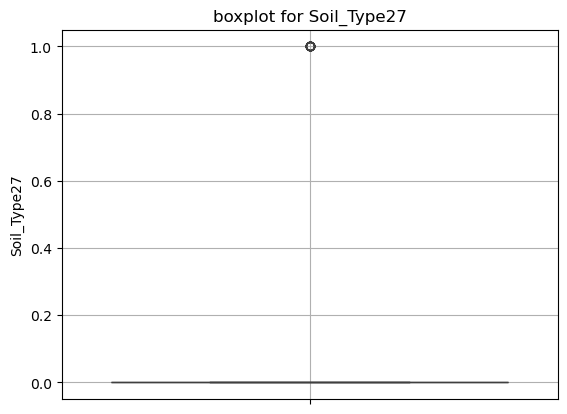

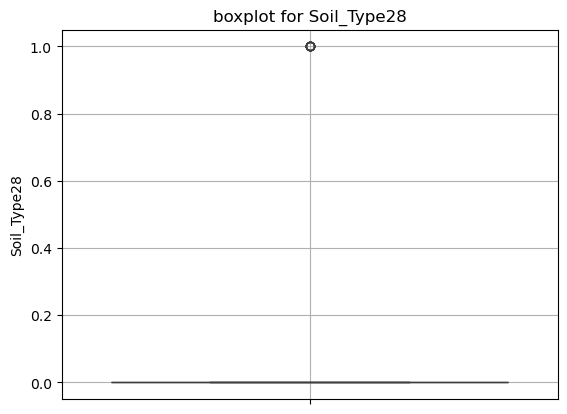

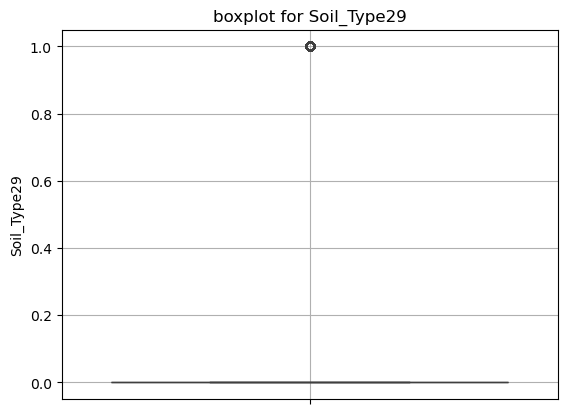

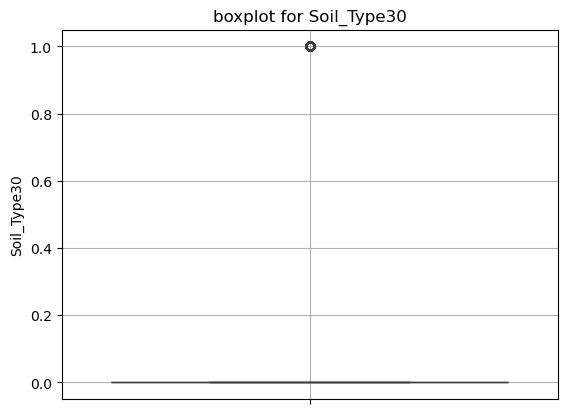

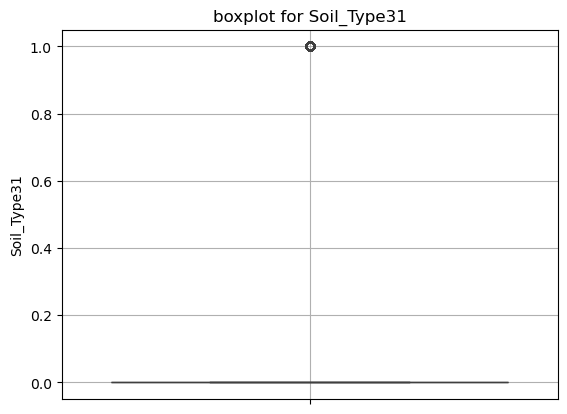

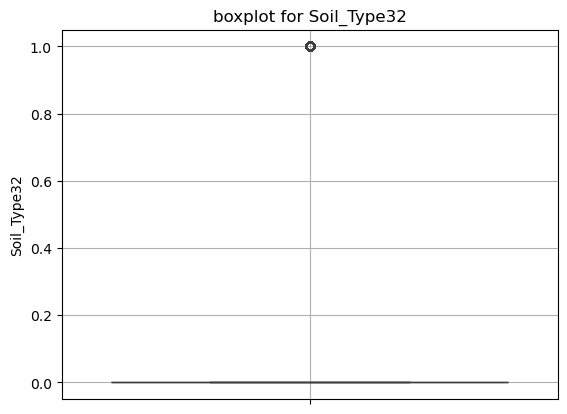

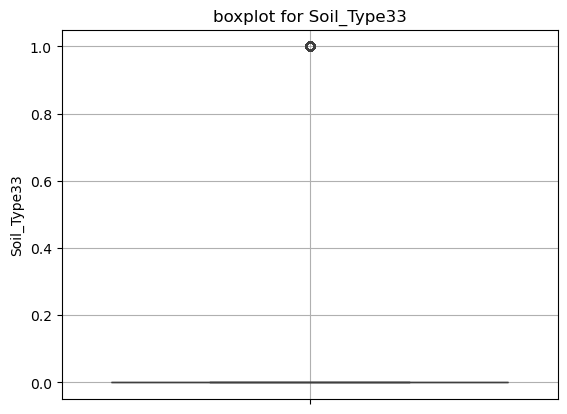

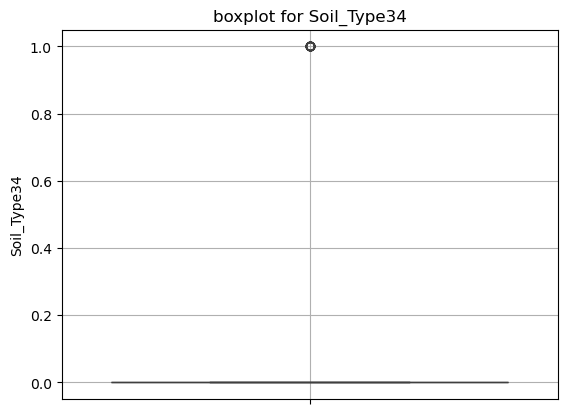

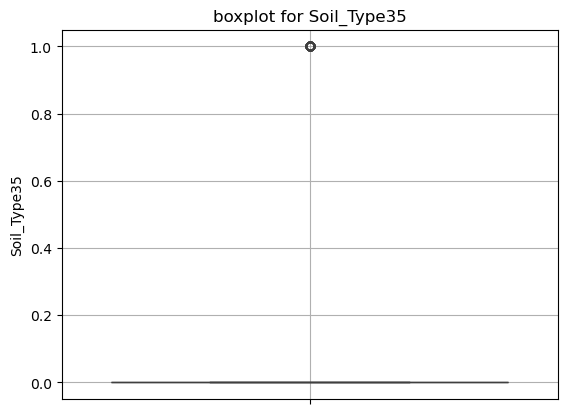

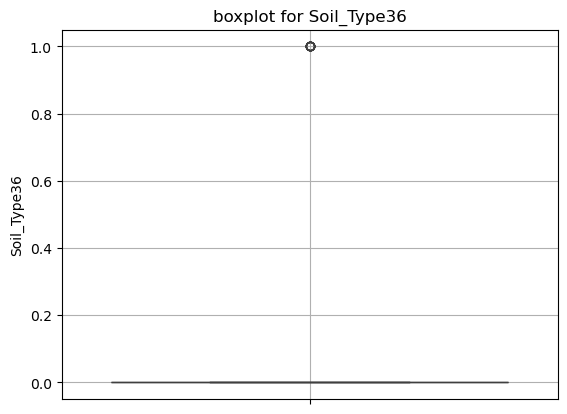

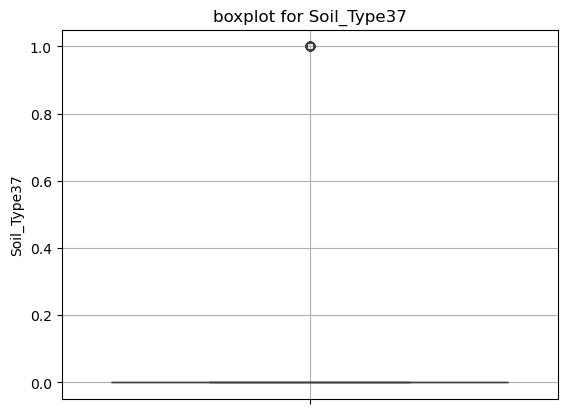

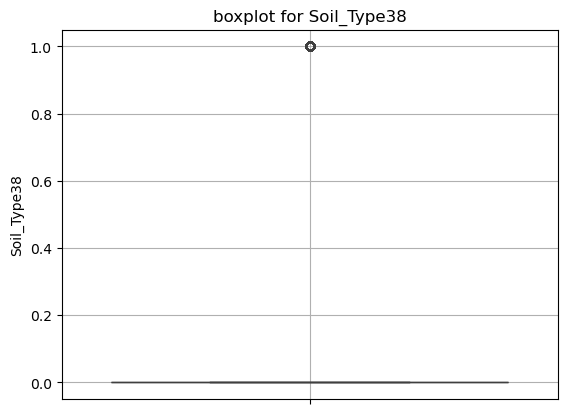

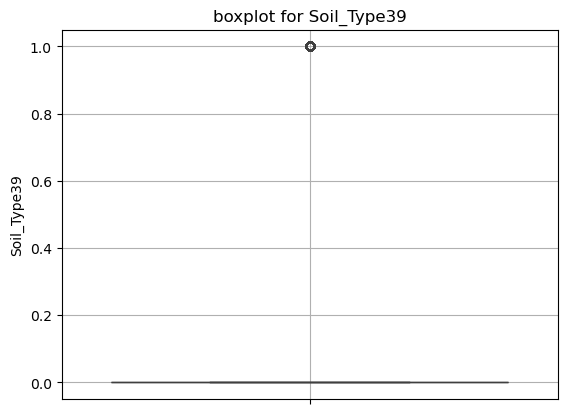

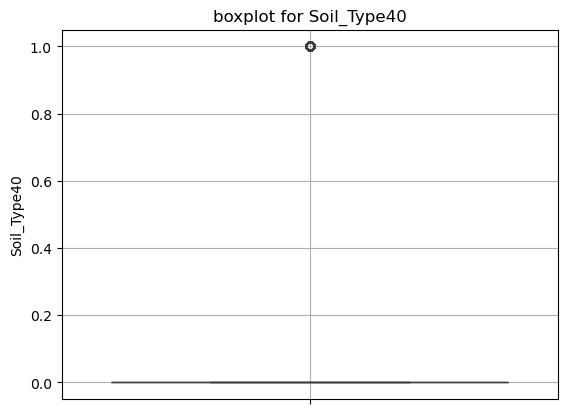

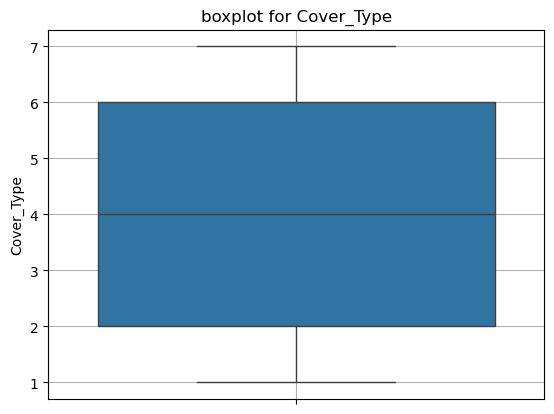

In [52]:
#Boxplot
num_col=df.select_dtypes(include='number').columns 
for col in num_col:
    sns.boxplot(data=df,y=col)
    plt.title(f'boxplot for {col}')
    plt.grid(True)
    plt.show()

In [53]:
# Handling outlier using IQR method
def handling_outliers(df):
    for col in df.select_dtypes(include='number').columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1-(1.5*IQR)
        upper_bound=Q3+(1.5*IQR)
        #Capping
        df[col]=df[col].apply(lambda x:lower_bound if x<lower_bound else upper_bound
                           if x>upper_bound else x)
    return df

In [54]:
# Apply the outlier handling function
df1=handling_outliers(df)
df1

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3.0,258.0,0.0,510.0,221.0,232.0,148.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2,2590,56,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,3,2804,139,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,4,2785,155,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,5,2595,45,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,2607,243,23.0,258.0,7.0,660.0,170.0,251.0,214.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
15116,15117,2603,121,19.0,633.0,190.0,618.0,249.0,221.0,91.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
15117,15118,2492,134,25.0,365.0,117.0,335.0,250.0,220.0,83.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
15118,15119,2487,167,28.0,218.0,101.0,242.0,229.0,237.0,119.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


<Axes: >

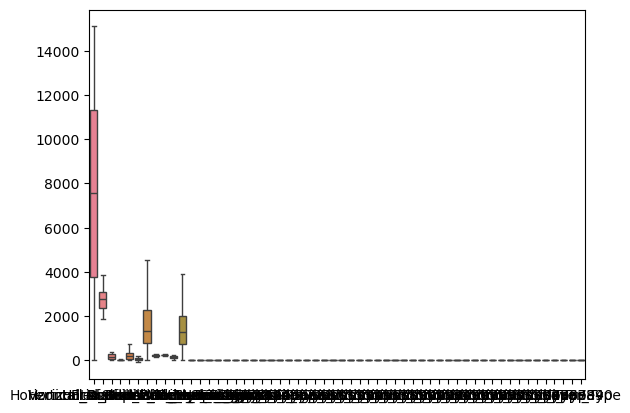

In [55]:
#Boxplot for df1 DataFrame
sns.boxplot(data=df1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Id                                  15120 non-null  int64  
 1   Elevation                           15120 non-null  int64  
 2   Aspect                              15120 non-null  int64  
 3   Slope                               15120 non-null  float64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  float64
 5   Vertical_Distance_To_Hydrology      15120 non-null  float64
 6   Horizontal_Distance_To_Roadways     15120 non-null  float64
 7   Hillshade_9am                       15120 non-null  float64
 8   Hillshade_Noon                      15120 non-null  float64
 9   Hillshade_3pm                       15120 non-null  float64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  float64
 11  Wilderness_Area1                    15120

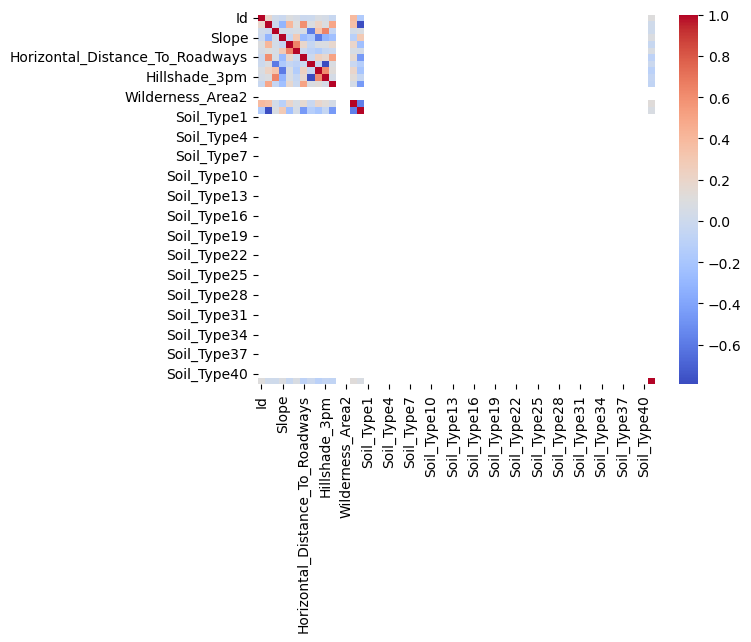

In [56]:
#Co-relation
c=df1.corr(numeric_only=True)
c

sns.heatmap(c,cmap='coolwarm')

df1.info()

In [57]:
y=df1['Cover_Type']   #Target variable
y

0        5
1        5
2        2
3        2
4        5
        ..
15115    3
15116    3
15117    3
15118    3
15119    3
Name: Cover_Type, Length: 15120, dtype: int64

In [58]:
x=df1.drop('Cover_Type',axis=1) #Feature variables 
x.columns


Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [59]:
# Apply SelectKBest
selector = SelectKBest(score_func=f_classif, k=13)  # select top 13 features

X_new = selector.fit_transform(x, y)

# Get selected feature names
selected_features = x.columns[selector.get_support()]

print("Top Selected Features:")
print(selected_features)

Top Selected Features:
Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area3', 'Wilderness_Area4'],
      dtype='object')


C:\Users\Hanith\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: UserWarning: Features [11 12 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36
 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Hanith\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [60]:
x= x[selected_features] #Retain only selected features

In [61]:
#Train-test-split
x_train,x_test,y_train, y_test =train_test_split(x,y,test_size=0.2,random_state=42)

In [62]:
x_train.shape

(12096, 13)

In [63]:
#Printing the Shapes of the Sets
print('x_train shape:',x_train.shape,'\nx_test shape:',x_test.shape,'\ny_train shape:',y_train.shape,'\ny_test shape:',y_test.shape)

x_train shape: (12096, 13) 
x_test shape: (3024, 13) 
y_train shape: (12096,) 
y_test shape: (3024,)


In [64]:
#feature scaling (Standardization)
ss=StandardScaler()
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

In [65]:
# Train and evaluate multiple models
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=200, random_state=42)
}

results = {}
#Train and evaluate each model
for name, model in models.items():
    print('\nTraining', name)
    model.fit(x_train_scaled, y_train)
    preds = model.predict(x_test_scaled)
    acc = accuracy_score(y_test, preds)
    print(f'Accuracy on test set: {acc:.4f}')
    print('Classification report:')
    print(classification_report(y_test, preds))
    results[name] = {'model': model, 'accuracy': acc}

# Convert results dictionary into a DataFrame for easier visualization
res_df = pd.DataFrame({k: {'accuracy': v['accuracy']} for k,v in results.items()}).T.sort_values('accuracy', ascending=False)
print('\nModel comparison:')
display(res_df)


Training LogisticRegression
Accuracy on test set: 0.6723
Classification report:
              precision    recall  f1-score   support

           1       0.65      0.64      0.64       421
           2       0.58      0.47      0.52       438
           3       0.59      0.47      0.53       428
           4       0.73      0.86      0.79       449
           5       0.67      0.79      0.72       416
           6       0.58      0.58      0.58       432
           7       0.85      0.90      0.87       440

    accuracy                           0.67      3024
   macro avg       0.66      0.67      0.66      3024
weighted avg       0.66      0.67      0.66      3024


Training SVM
Accuracy on test set: 0.7583
Classification report:
              precision    recall  f1-score   support

           1       0.70      0.67      0.69       421
           2       0.75      0.58      0.65       438
           3       0.68      0.60      0.64       428
           4       0.79      0.96      

,accuracy
RandomForest,0.865741
GradientBoosting,0.823082
SVM,0.758267
LogisticRegression,0.672288


In [66]:
#Identify and save the best-performing model

best_model_name = max(results, key=lambda name: results[name]['accuracy'])
best_model = models[best_model_name]

In [67]:
print(f"Best Model: {best_model_name} (Accuracy: {results[best_model_name]['accuracy']})")

Best Model: RandomForest (Accuracy: 0.8657407407407407)


In [68]:
import joblib
# Save the best model using joblib
joblib.dump(best_model, f"{best_model_name}_best_model.pkl")
print(f"Model saved as '{best_model_name}_best_model.pkl'")

Model saved as 'RandomForest_best_model.pkl'
